In [4]:
import pydicom
from pydicom.data import get_testdata_file
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks

source1=np.zeros((757,750,593))

ds = pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/key/yeet/scale_best_dosetomedium_vhee_shapedbeam_250MV_5M.dcm")
source1+=ds.pixel_array*ds.DoseGridScaling
sfrt250=source1

source1=np.zeros((757,750,593))
ds = pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/key/yeet/scale_best_dosetomedium_vhee_shapedopenbeam_250MV_5M.dcm")
source1+=ds.pixel_array*ds.DoseGridScaling
openbeam250=source1

ds = pydicom.dcmread('d:/Desktop/DICOM_stuff/RD.2.16.840.1.114362.1.5.6.1.121121.6102256374.313565332.637.1446.dcm')
rtplan=ds.pixel_array*ds.DoseGridScaling

187.25


<Figure size 504x504 with 0 Axes>

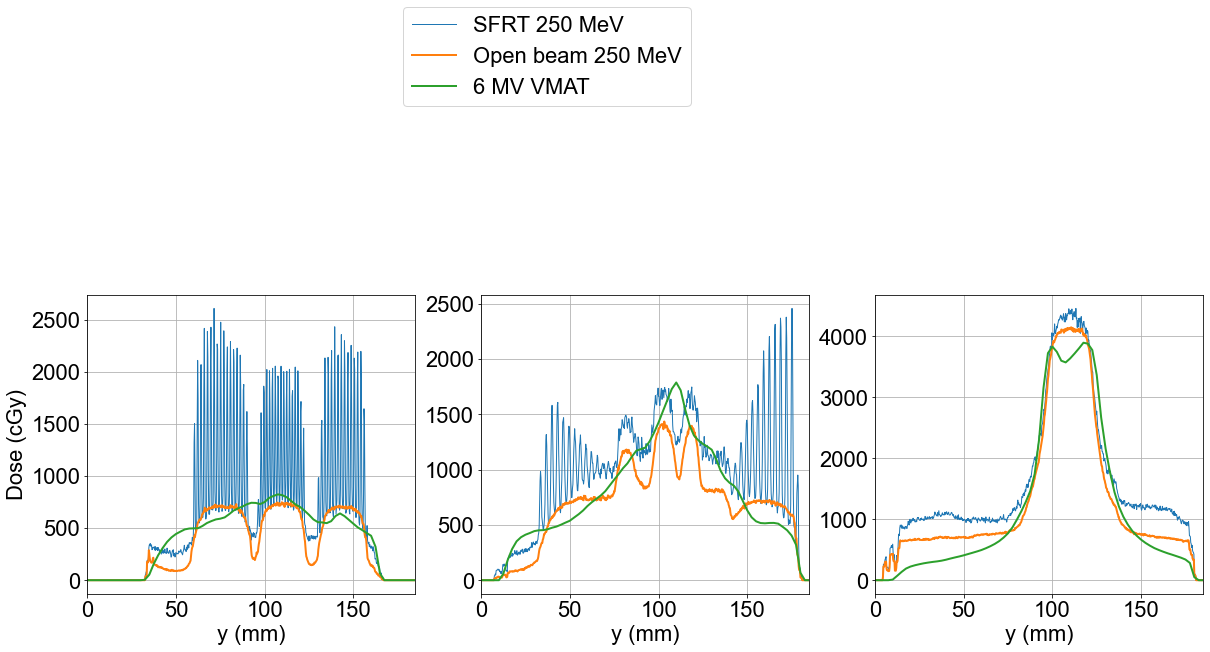

<Figure size 504x504 with 0 Axes>

In [42]:
import pandas as pd
from scipy.interpolate import interp1d
%matplotlib inline

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)


zslices=[358,351,345,338,332,326,319,313]

zslice=325
xvalues=[107,227,344]
maxdose=310

sfrt250profile=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
open250profile=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
sfrt250profile2=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
open250profile2=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
sfrt250profile3=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
open250profile3=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))

x= np.arange(0,len(sfrt250[zslice,:,xvalues[0]]))*0.25
x_rtplan=np.arange(0,len(rtplan[114,:,34]))*2.5-5
for i in zslices:
    sfrt250profile+=np.array(sfrt250[i,:,xvalues[0]])
    open250profile+=np.array(openbeam250[i,:,xvalues[0]])
    
    
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5.5))
ax1.plot(x,sfrt250profile/len(zslices),label='SFRT 250 MeV',lw=1)
ax1.plot(x,open250profile/len(zslices), label= 'Open beam 250 MeV',lw=2)
ax1.plot(x_rtplan,rtplan[114,:,34]*100,label= 'RT plan',lw=2)
ax1.set_ylabel('Dose (cGy)')
ax1.set_xlabel('y (mm)')
ax1.grid()
#ax1.set_ylim(0,maxdose)
ax1.set_xlim(0,185)
#ax1.legend()


for i in zslices:
    sfrt250profile2+=np.array(sfrt250[i,:,xvalues[1]])
    open250profile2+=np.array(openbeam250[i,:,xvalues[1]])
ax2.plot(x,sfrt250profile2/len(zslices),label='SFRT 250 MeV',lw=1)
ax2.plot(x,open250profile2/len(zslices), label= 'Open beam 250 MeV',lw=2)
ax2.plot(x_rtplan,rtplan[114,:,47]*100,label= 'RT plan',lw=2)
ax2.set_xlabel('y (mm)')
ax2.grid()
#ax2.set_ylim(0,maxdose)
ax2.set_xlim(0,185)
#ax2.legend()


for i in zslices:
    sfrt250profile3+=np.array(sfrt250[i,:,xvalues[2]])
    open250profile3+=np.array(openbeam250[i,:,xvalues[2]])
ax3.plot(x,sfrt250profile3/len(zslices),label='SFRT 250 MeV',lw=1)
ax3.plot(x,open250profile3/len(zslices), label= 'Open beam 250 MeV',lw=2)
ax3.plot(x_rtplan,rtplan[114,:,58]*100,label= '6 MV VMAT',lw=2)
ax3.set_xlabel('y (mm)')
ax3.grid()
#ax3.set_ylim(0,maxdose)
ax3.set_xlim(0,185)
ax3.legend(bbox_to_anchor=(-1,2), loc="upper center")
#fig.tight_layout()

# figure(2,figsize=(8,8))
# for i in zslices:
#     plt.plot(x,sfrt250[i,:,xvalues[2]])
#     plt.grid()
# plt.plot(x,sfrt250[335,:,xvalues[2]])
print(max(x))

figure(2,figsize=(7,7))


(0.0, 185.0)

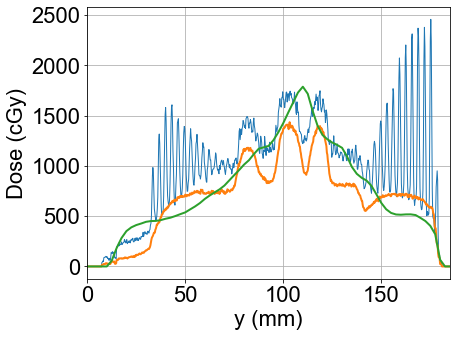

In [41]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
sfrt250profile=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
open250profile=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
sfrt250profile2=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
open250profile2=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
sfrt250profile3=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
open250profile3=np.zeros(len(sfrt250[zslice,:,xvalues[0]]))
figure(2,figsize=(6.5,5))
for i in zslices:
    sfrt250profile2+=np.array(sfrt250[i,:,xvalues[1]])
    open250profile2+=np.array(openbeam250[i,:,xvalues[1]])
plt.plot(x,sfrt250profile2/len(zslices),label='SFRT 250 MeV',lw=1)
plt.plot(x,open250profile2/len(zslices), label= 'Open beam 250 MeV',lw=2)
plt.plot(x_rtplan,rtplan[114,:,47]*100,label= 'RT plan',lw=2)
plt.xlabel('y (mm)')
plt.ylabel('Dose (cGy)')
plt.grid()
#plt.set_ylim(0,maxdose)
plt.xlim(0,185)
#plt.legend()